In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
# 폰트 관련 용도
# import matplotlib.font_manager as fm
import cv2

import torch
from torch import nn, optim
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision import models, datasets, transforms
# from torchinfo import summary

# 기본 폰트 설정
# plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
import os
import cv2

import torch
from torch import nn, optim
from torchvision import models, datasets, transforms
from torchvision.io import read_image
import torchvision.transforms.functional as F

import time

In [4]:
weights = models.ViT_B_16_Weights.IMAGENET1K_V1
vit = models.vit_b_16(weights=weights)
print(vit)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 224MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [17]:
preprocess = weights.transforms()
print(preprocess)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [18]:
vit = vit.to(device)

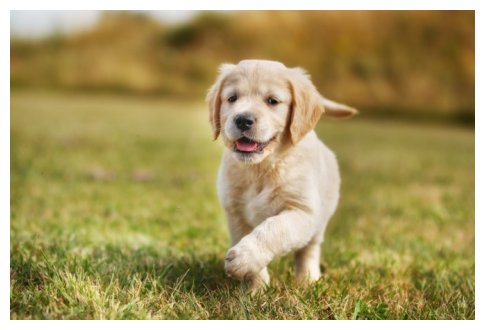

In [19]:
from PIL import Image

filename = 'golden.jpg'

img = Image.open(filename)

plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
img_tensor = preprocess(img).unsqueeze(0).to(device)
print(img_tensor.shape)

torch.Size([1, 3, 224, 224])


In [26]:
import time

start = time.time()
output = vit(img_tensor)
stop = time.time()

print(f"estimation time = {(stop-start)*1000:.3f}ms")

estimation time = 10.304ms


In [38]:
idx = output.argmax(-1)
# print(idx)

score = output.softmax(-1)[0, idx].item()
score

classes = weights.meta['categories'][idx]
classes

'golden retriever'

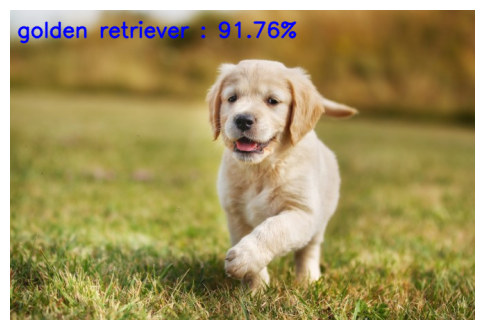

In [42]:
img_np = np.array(img)

text = f"{classes} : {score*100:.2f}%"
cv2.putText(img_np, text, (10, 40), 0, 1, (0, 0, 255), 2, cv2.LINE_AA)
plt.imshow(img_np)
plt.axis('off')
plt.show()